# Part II - What factors affect a loan’s outcome status?
## by Yen Hoang




## Investigation Overview


The analysis is to investigate the affects of some factors on loan's outcome status. I focus on the relationships between Loan Status, ListingCategory, LoanOriginalAmount, Term, ProsperScore, and BankcardUtilization. 


## Dataset Overview

This document explores a dataset containing loans and its 82 attributes for approximately 100,000 loans made on Prosper. The purpose is to find out what factors affect to loan status and how. To answer this question, some data  trimoff and wrangling were made to keep the data tidy and relevant. After wrangling, the dataset used for my analysis has nearly 50000 records. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# Data Wrangling
#Drop loans with status 'Current'
loans = loans[loans['LoanStatus'] != 'Current']

In [4]:
#Map the listing category by its numeric format
Listing_category = {0:'Not Available', 
                   1:'Debt Consolidation',
                   2:'Home Improvement',
                   3:'Business',
                   4:'Personal Loan',
                   5:'Student Use',
                   6:'Auto',
                   7:'Other', 
                   8:'Baby&Adoption', 
                   9:'Boat', 
                   10:'Cosmetic Procedure', 
                   11:'Engagement Ring', 
                   12:'Green Loans', 
                   13:'Household Expenses', 
                   14:'Large Purchases', 
                   15:'Medical/Dental',
                   16:'Motorcycle', 
                   17:'RV', 
                   18:'Taxes',
                   19:'Vacation', 
                   20:'Wedding Loans'}
loans['ListingCategory'] = loans['ListingCategory (numeric)'].map(Listing_category)

In [5]:
#Order Loan status from best to worst
ordinal_status_dict = ['Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)',
                       'Past Due (31-60 days)','Past Due (91-120 days)', 'Past Due (>120 days)', 'Defaulted', 'Chargedoff', 'Cancelled' ]
ordered_status = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_status_dict)
loans['LoanStatus'] = loans['LoanStatus'].astype(ordered_status)

## Distribution of loans status

Among different loan statuses, the completed one is the most popular with over 30000 loans. Howerver, bad loans such as Chargedoff loan and Defaulted one account for a considerable amount, which is over 10000 and nearly 5000 respectively. Different Past due ones and Cancelled one take a very small amount. The same happens for Final payment in progess loans.

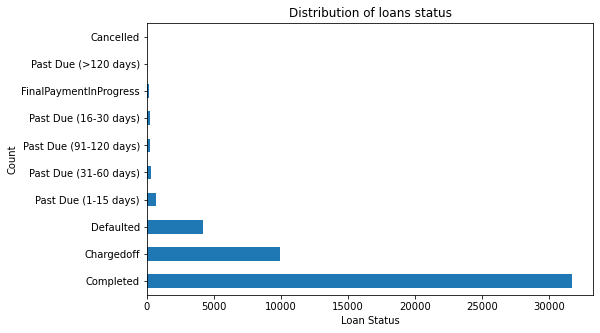

In [6]:
#Distribution of loans status
plt.figure(figsize=[8, 5])
loans.LoanStatus.value_counts().plot(kind = 'barh')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of loans status')
plt.show()

## Distribution of Listing Category

Among listing categories, debt consolidation is the most common reason for a loan. Other reasons have much less frequency. There is also a large amount of loans with no specific reason.

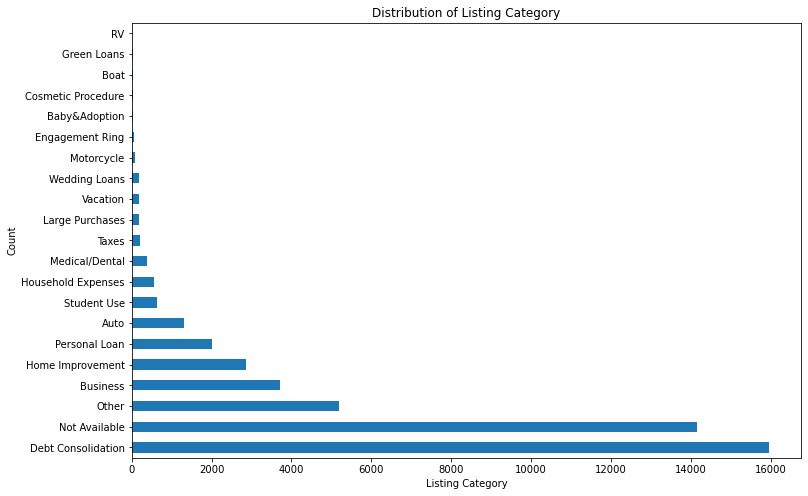

In [7]:
#Distribution of Listing Category
plt.figure(figsize=[12, 8])
loans['ListingCategory'].value_counts().plot(kind = 'barh')
plt.xlabel('Listing Category')
plt.xticks()
plt.ylabel('Count')
plt.title('Distribution of Listing Category')
plt.show()

## Distribution of Loan original amount

The distribution of Loan original amount is right skewed with the peak at 4000. However, there are high amount of 10000$, 20000$ and 25000$ loans. After each of those spike, the frequency quickly trails off. These probably represents the standard amount of loans.

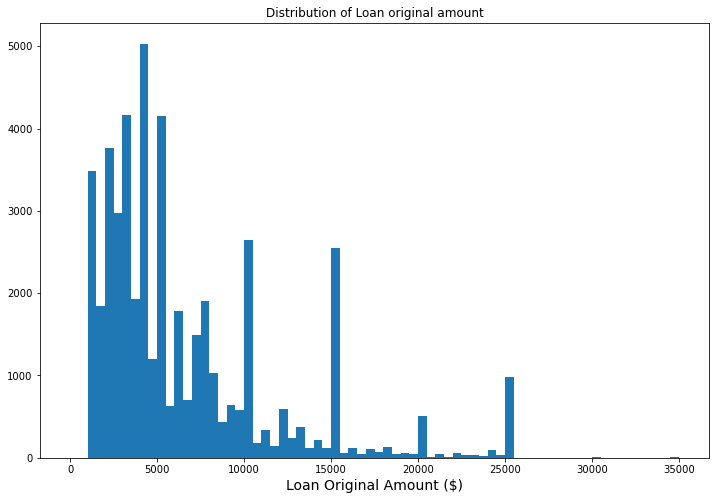

In [8]:
#Distribution of Loan original amount
binsize = 500
bins = np.arange(0, loans['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount ($)', size = 14)
plt.title('Distribution of Loan original amount')
plt.show()

## Distribution of prosper score among different loan status

Completed loans have the highest prosper score and the average score decreases when the loans past due. Surprisingly, defaulted and chargedoff loans have the same prosper score as loans in final payment progress, meaning they have higher prosper score than past due loans, even though their prosper score is still less than completed loans.

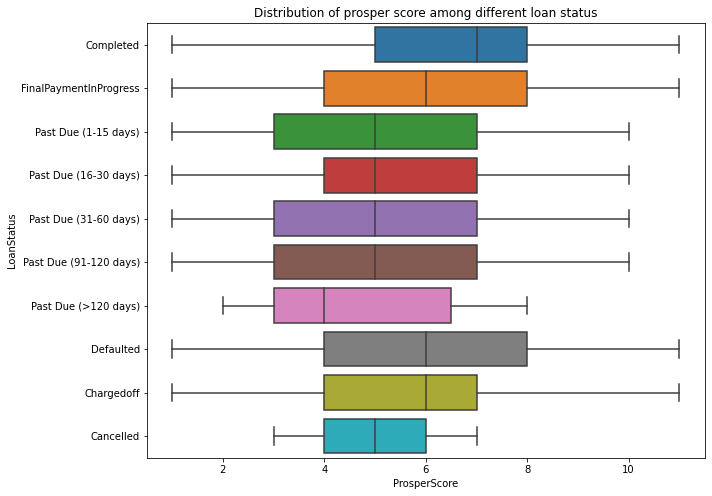

In [9]:
plt.figure(figsize = [10, 8])
sb.boxplot(data=loans, y='LoanStatus', x='ProsperScore', orient='h')
plt.title('Distribution of prosper score among different loan status')
plt.show();

## Distribution of prosper score among different listing category

Among Listing categories, most of listing have the average prosper score of 6. Student use loan and Boat loan have highest average prosper score, which is 8. Household expense and Baby&Adoption listings have the lowest prosper score.

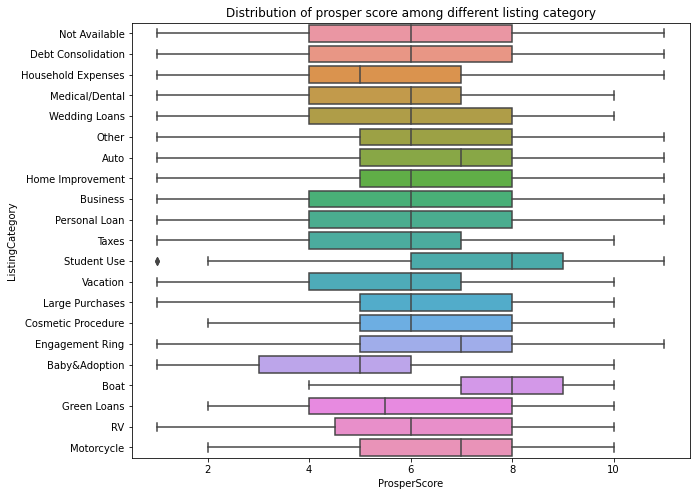

In [10]:
plt.figure(figsize = [10, 8])
sb.boxplot(data=loans, y='ListingCategory', x='ProsperScore', orient='h')
plt.title('Distribution of prosper score among different listing category')
plt.show();

## Relationship between prosper score, listing category and loan status

Overall, completed loans have highest prosper score for most of listing categories, even though listing categories has different prosper score ranges. There are stil exceptions for Engagement ring loans, Household expenses, Cosmestic procedure, green loan and motorcycle. 

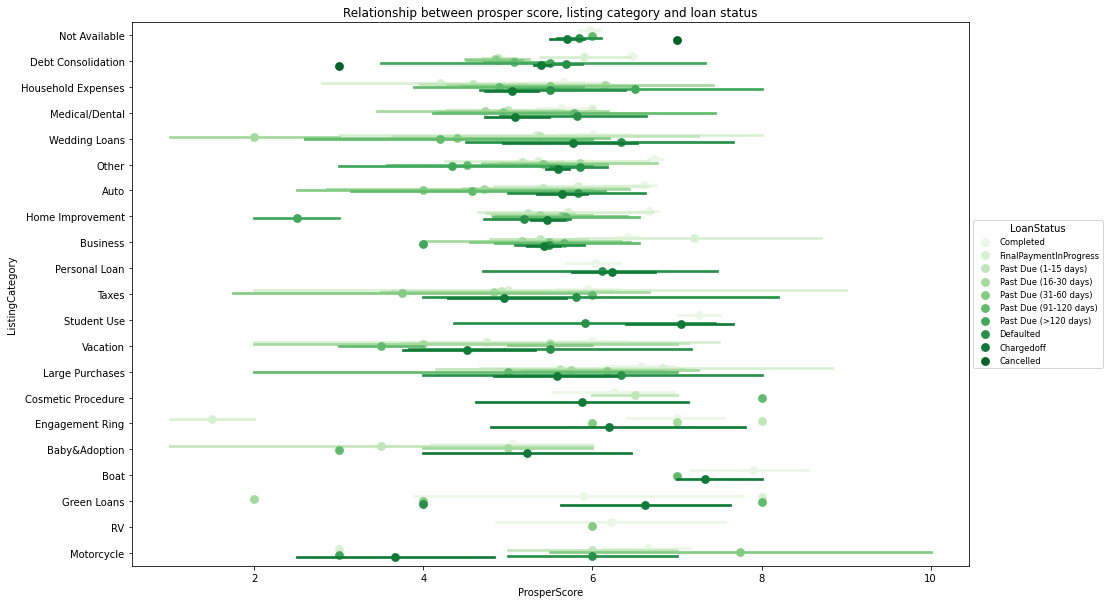

In [11]:
plt.figure(figsize = [15,10])
sb.pointplot(data = loans, y = 'ListingCategory', x = 'ProsperScore', hue = 'LoanStatus', orient = 'h',
             palette = 'Greens', linestyles = '', dodge = 0.4)
plt.legend(title="LoanStatus", loc = 6, fontsize='small', bbox_to_anchor = (1.0, 0.5))
plt.title('Relationship between prosper score, listing category and loan status')
plt.show();

## Relationship between prosper score, listing category and loan term

12-month term loans have the highest average prosper score in all listing categories (except ones that doesn't have this kind of loan term). Interestingly, the other loan terms (36 moth and 60 month) have different average prosper score comparision depending on listing category. 12/19 categories have higher prosper score for 60-month term and the remaining 7 categories are opposite.

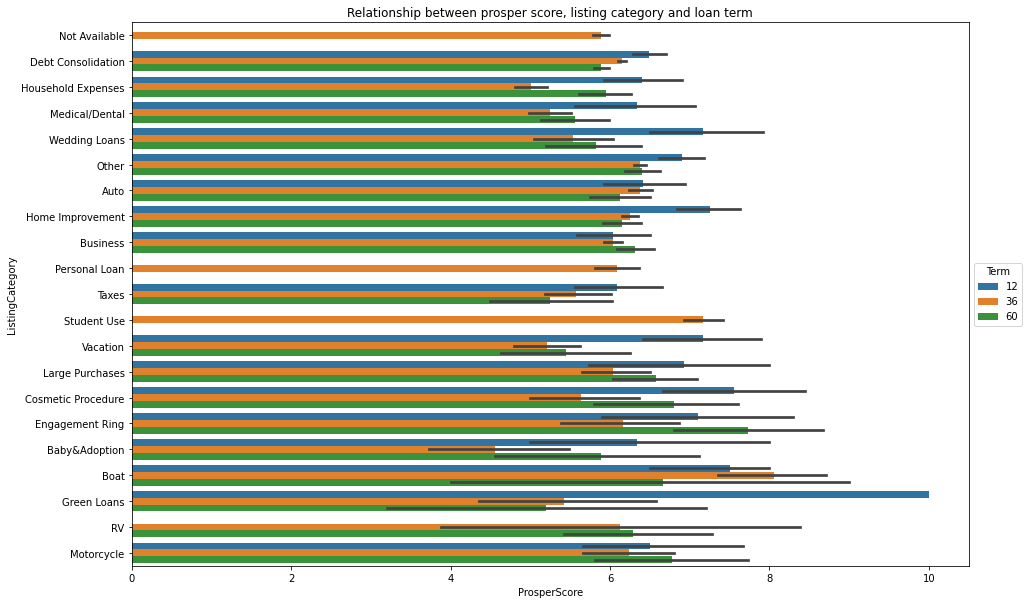

In [12]:
plt.figure(figsize = [15,10])
sb.barplot(data = loans, y = 'ListingCategory', x = 'ProsperScore', hue = 'Term', orient = 'h')
plt.legend(title = 'Term', loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.title('Relationship between prosper score, listing category and loan term')
plt.show();

## Relationship between prosper score, loan status and loan term

As expected, completed loans have highest average score for all loan terms compared to other loan status. However, for this loan status, 12-month term has the highest average prosper score and 60-month term has the lowest prosper score. This is contrast with most of other loans where 12-month term is the lowest and 60-month term is the highest.

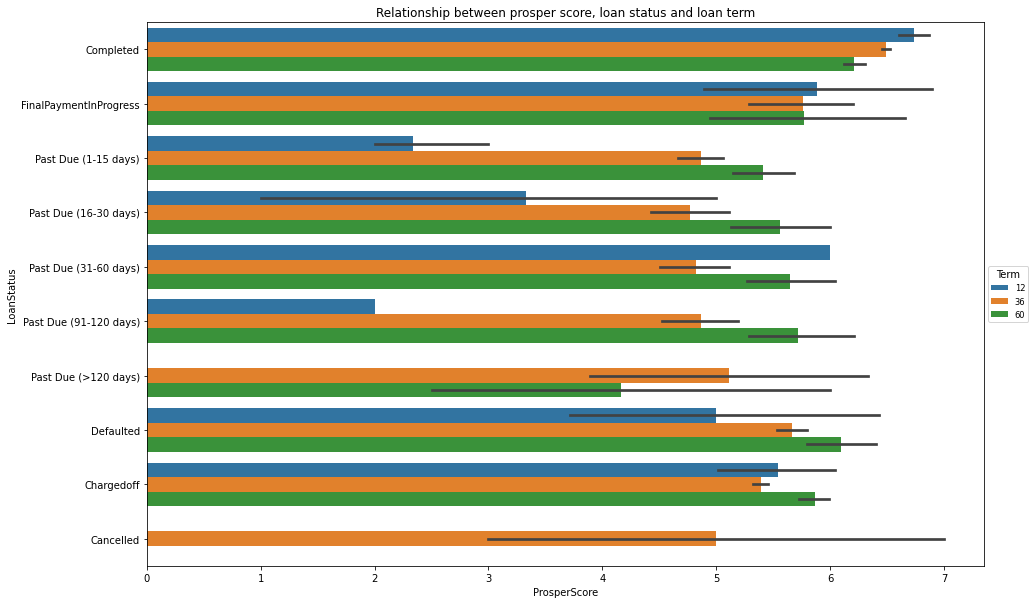

In [13]:
plt.figure(figsize = [15,10])
sb.barplot(data = loans, y = 'LoanStatus', x = 'ProsperScore', hue = 'Term',  orient = 'h' )
plt.legend( title = 'Term', loc = 6, fontsize='small', bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.title('Relationship between prosper score, loan status and loan term')
plt.show();

In [14]:
!jupyter nbconvert YenHoang_Project5_PartII_ProsperLoanAnalysis.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook YenHoang_Project5_PartII_ProsperLoanAnalysis.ipynb to slides
[NbConvertApp] Writing 880903 bytes to YenHoang_Project5_PartII_ProsperLoanAnalysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\YenH1\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\YenH1\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\YenH1\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\YenH1\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\YenH1\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self